<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ReduceExcelRowsParticles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows
def filter_rows(df):
    return df[df.index % 5 == 1]

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, df in filtered_data.items():
        df.to_excel(writer, sheet_name=sheet, index=False)

output_file_path

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df):
    patterns = [2, 3]#, 4, 5, 6, 8, 10, 12, 15, 20]
    filtered_data = {f'Pattern_{pattern}': df[df.index % pattern == 1] for pattern in patterns}
    return filtered_data

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel with new sheets
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, patterns in filtered_data.items():
        for pattern, df in patterns.items():
            df.to_excel(writer, sheet_name=f'{sheet}_{pattern}', index=False)

output_file_path

'/content/particleLocations_filtered.xlsx'

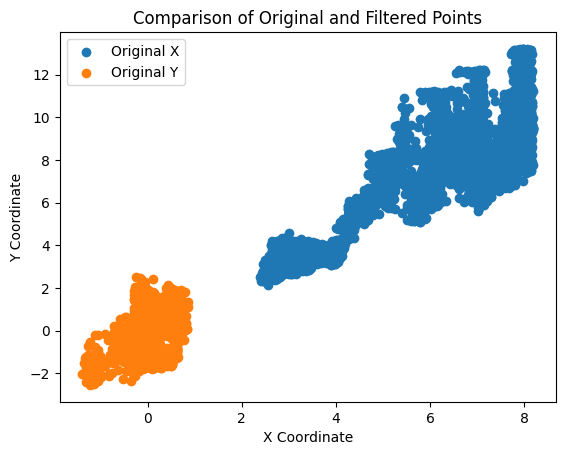

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if all(f'Column{step}' in sheet_data.columns for step in time_steps_to_plot):
        plt.scatter(sheet_data[f'Column{time_steps_to_plot[0]}'], sheet_data[f'Column{time_steps_to_plot[1]}'], label=f'Original {sheet_name}')

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if all(f'Column{step}' in pattern_data_df.columns for step in time_steps_to_plot):
            plt.scatter(pattern_data_df[f'Column{time_steps_to_plot[0]}'], pattern_data_df[f'Column{time_steps_to_plot[1]}'], label=f'Filtered {sheet_name} - Pattern {pattern}')

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Comparison of Original and Filtered Points')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the time steps to plot
time_steps_to_plot = [0, 100, 149]

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if all(f'Column{step}' in sheet_data.columns for step in time_steps_to_plot):
        plt.scatter(
            sheet_data[f'Column{time_steps_to_plot[0]}'],
            sheet_data[f'Column{time_steps_to_plot[1]}'],
            label=f'Original {sheet_name}',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if all(f'Column{step}' in pattern_data_df.columns for step in time_steps_to_plot):
            plt.scatter(
                pattern_data_df[f'Column{time_steps_to_plot[0]}'],
                pattern_data_df[f'Column{time_steps_to_plot[1]}'],
                label=f'Filtered {sheet_name} - Pattern {pattern}',
                s=50,  # Adjust the marker size as needed
                alpha=0.7  # Adjust transparency
            )

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Comparison of Original and Filtered Points')
plt.show()

IndexError: list index out of range

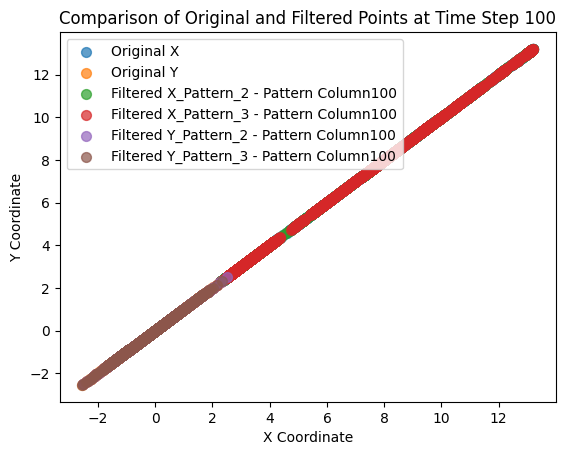

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Select the time step to plot
time_step_to_plot = 100

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if f'Column{time_step_to_plot}' in sheet_data.columns:
        plt.scatter(
            sheet_data['Column100'],
            sheet_data['Column100'],
            label=f'Original {sheet_name}',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if f'Column{time_step_to_plot}' in pattern_data_df.columns:
            plt.scatter(
                pattern_data_df['Column100'],
                pattern_data_df['Column100'],
                label=f'Filtered {sheet_name} - Pattern {pattern}',
                s=50,  # Adjust the marker size as needed
                alpha=0.7  # Adjust transparency
            )

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Comparison of Original and Filtered Points at Time Step {time_step_to_plot}')
plt.show()


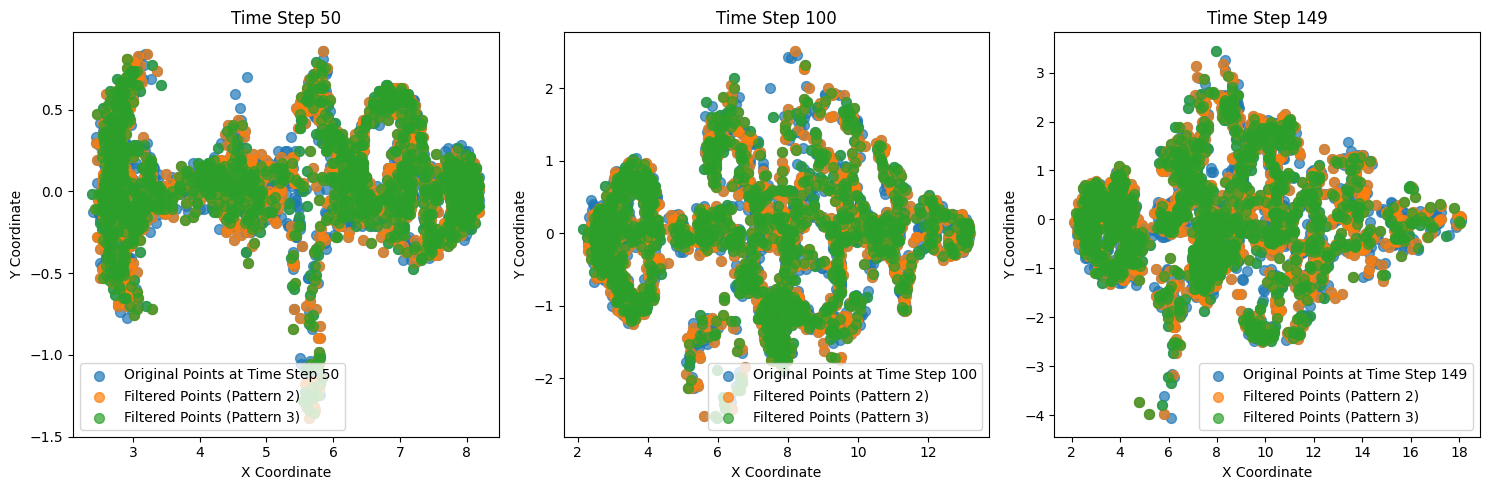

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3]  # Add more patterns if needed

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(time_steps_to_plot), figsize=(15, 5))

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label=f'Original Points at Time Step {time_step}',
        s=50,  # Adjust the marker size as needed
        alpha=0.7  # Adjust transparency
    )

    # Plot filtered points for each pattern
    for pattern in patterns:
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        axes[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'Filtered Points (Pattern {pattern})',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

    # Set subplot title and labels
    axes[i].set_title(f'Time Step {time_step}')
    axes[i].legend()
    axes[i].set_xlabel('X Coordinate')
    axes[i].set_ylabel('Y Coordinate')

# Adjust layout
plt.tight_layout()
plt.show()

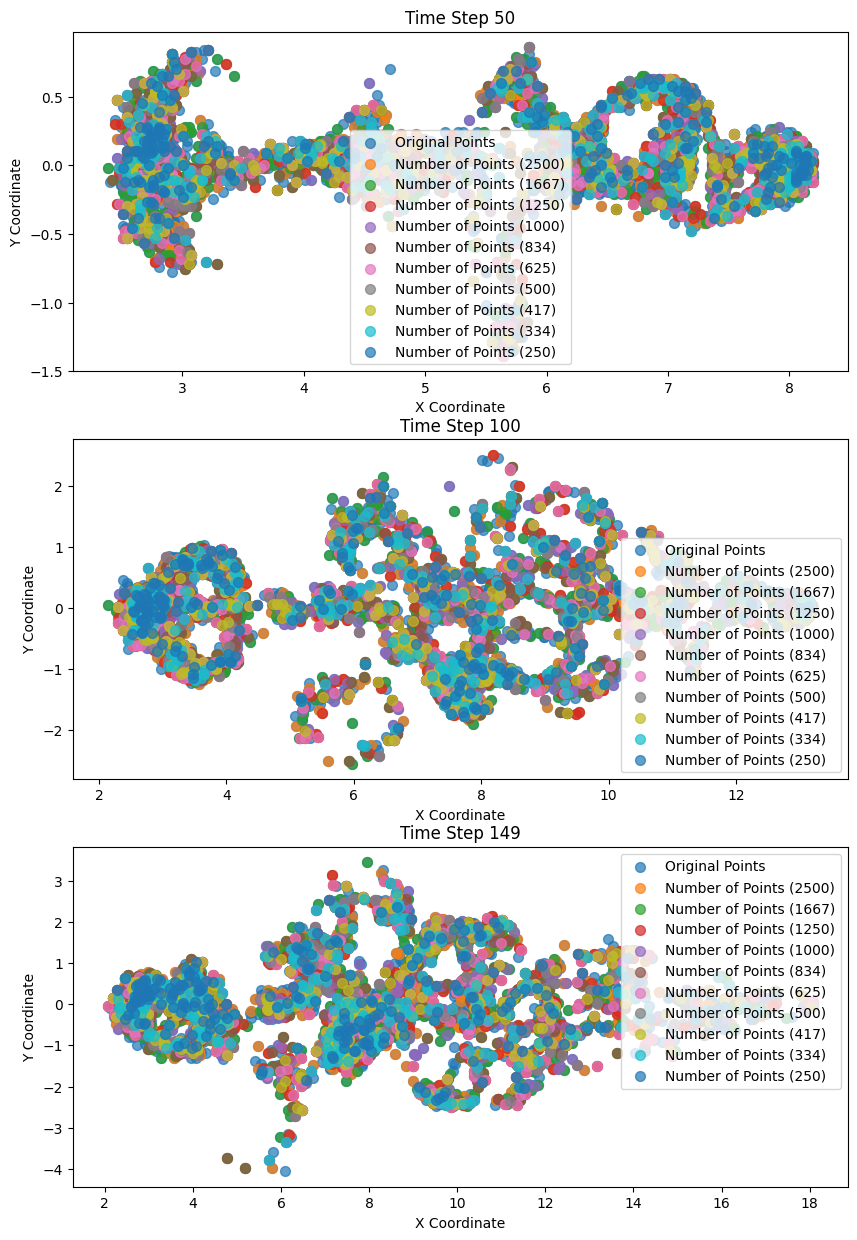

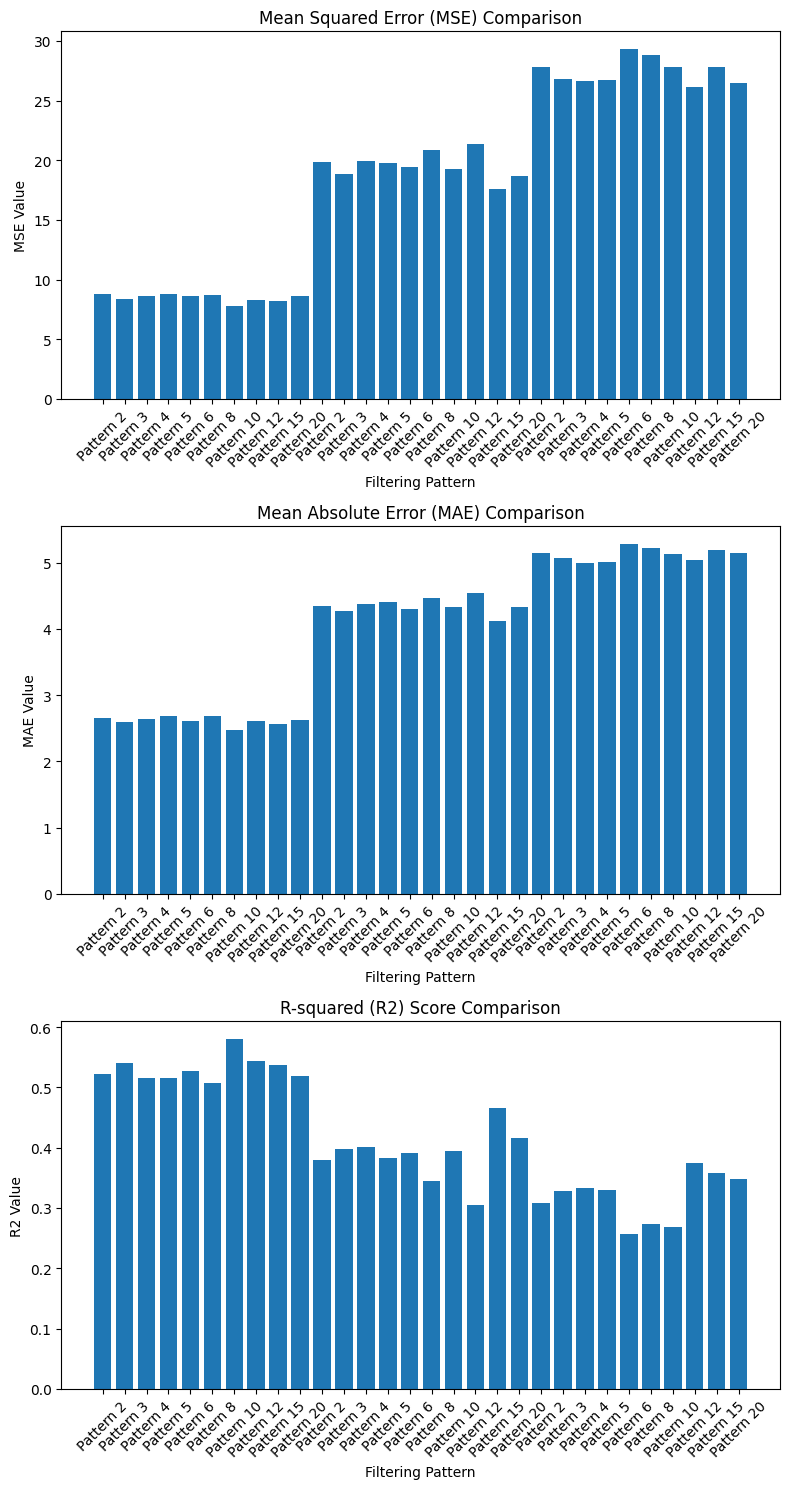

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]  # Updated patterns

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label=f'Original Points',
        s=50,
        alpha=0.7
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend()
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'Number of Points ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend()
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Add a subplot for displaying MSE values
axes_metrics[0].bar(range(len(mse_values)), mse_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[0].set_title('Mean Squared Error (MSE) Comparison')
axes_metrics[0].set_ylabel('MSE Value')
axes_metrics[0].set_xlabel('Filtering Pattern')
axes_metrics[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying MAE values
axes_metrics[1].bar(range(len(mae_values)), mae_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[1].set_title('Mean Absolute Error (MAE) Comparison')
axes_metrics[1].set_ylabel('MAE Value')
axes_metrics[1].set_xlabel('Filtering Pattern')
axes_metrics[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying R2 values
axes_metrics[2].bar(range(len(r2_values)), r2_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[2].set_title('R-squared (R2) Score Comparison')
axes_metrics[2].set_ylabel('R2 Value')
axes_metrics[2].set_xlabel('Filtering Pattern')
axes_metrics[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


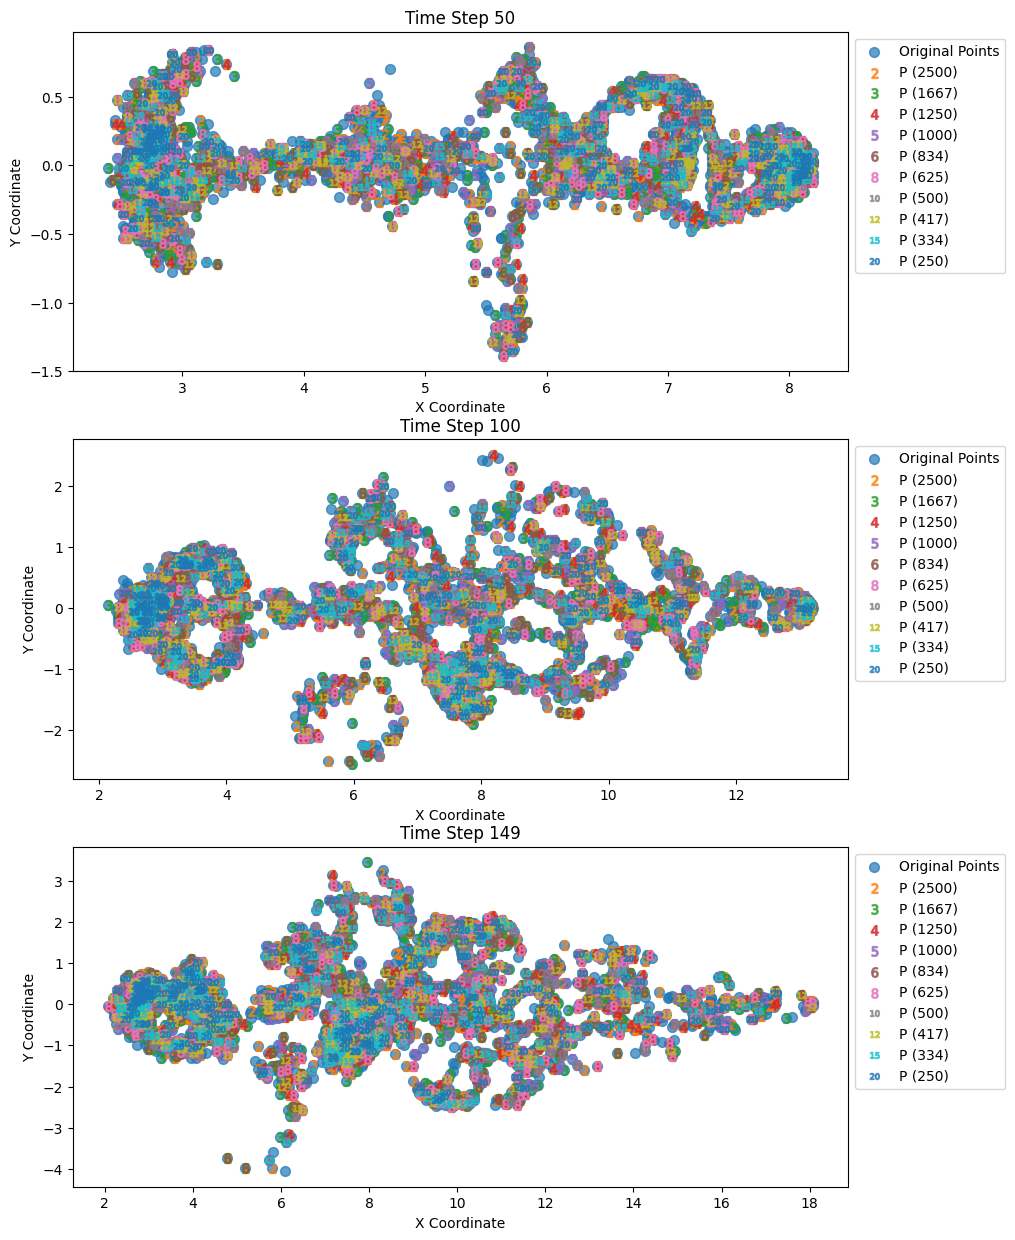

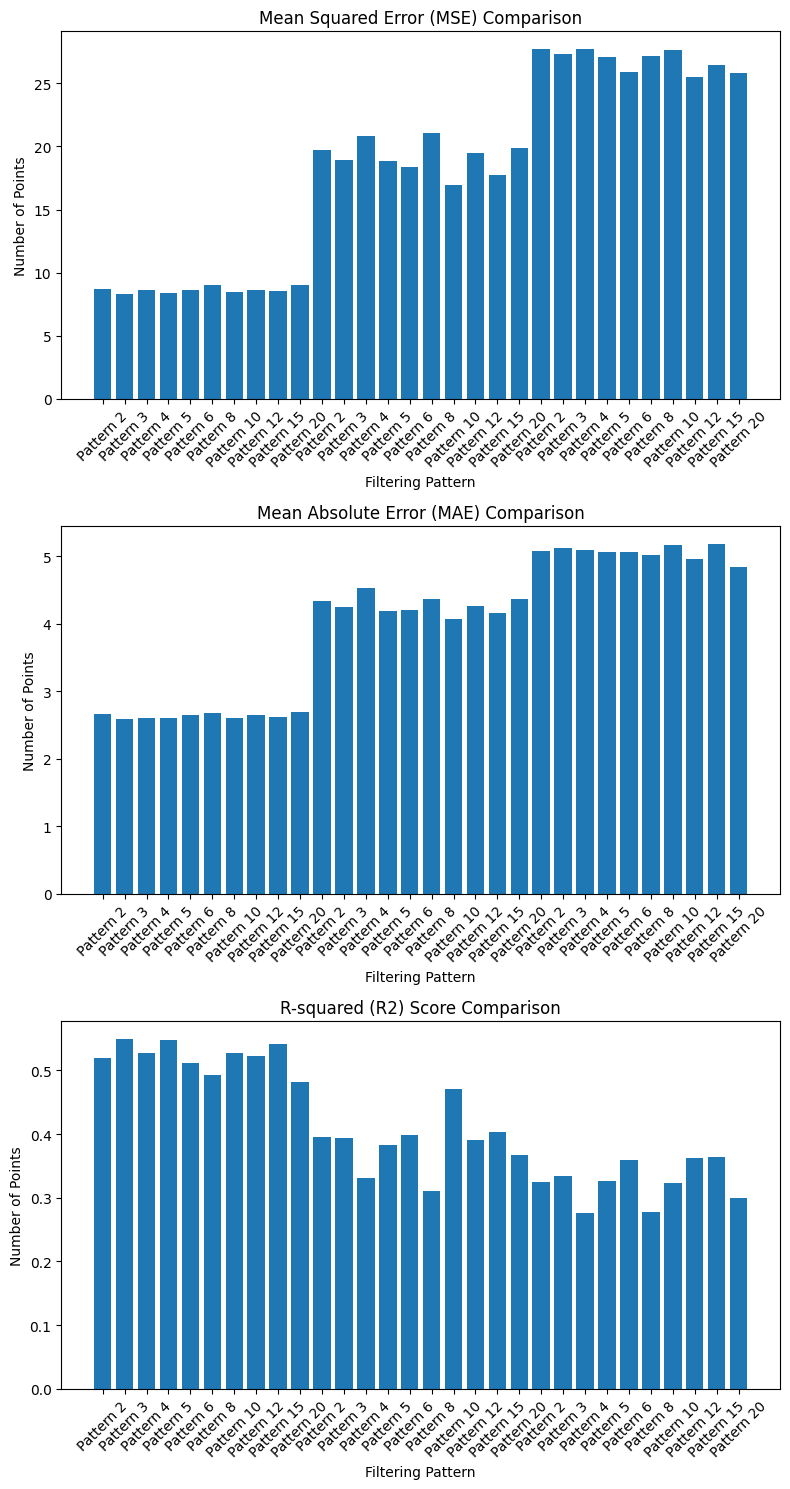

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]  # Updated patterns

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside in the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside in the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Add a subplot for displaying MSE values
axes_metrics[0].bar(range(len(mse_values)), mse_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[0].set_title('Mean Squared Error (MSE) Comparison')
axes_metrics[0].set_ylabel('Number of Points')  # Updated ylabel
axes_metrics[0].set_xlabel('Filtering Pattern')
axes_metrics[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying MAE values
axes_metrics[1].bar(range(len(mae_values)), mae_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[1].set_title('Mean Absolute Error (MAE) Comparison')
axes_metrics[1].set_ylabel('Number of Points')  # Updated ylabel
axes_metrics[1].set_xlabel('Filtering Pattern')
axes_metrics[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying R2 values
axes_metrics[2].bar(range(len(r2_values)), r2_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[2].set_title('R-squared (R2) Score Comparison')
axes_metrics[2].set_ylabel('Number of Points')  # Updated ylabel
axes_metrics[2].set_xlabel('Filtering Pattern')
axes_metrics[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

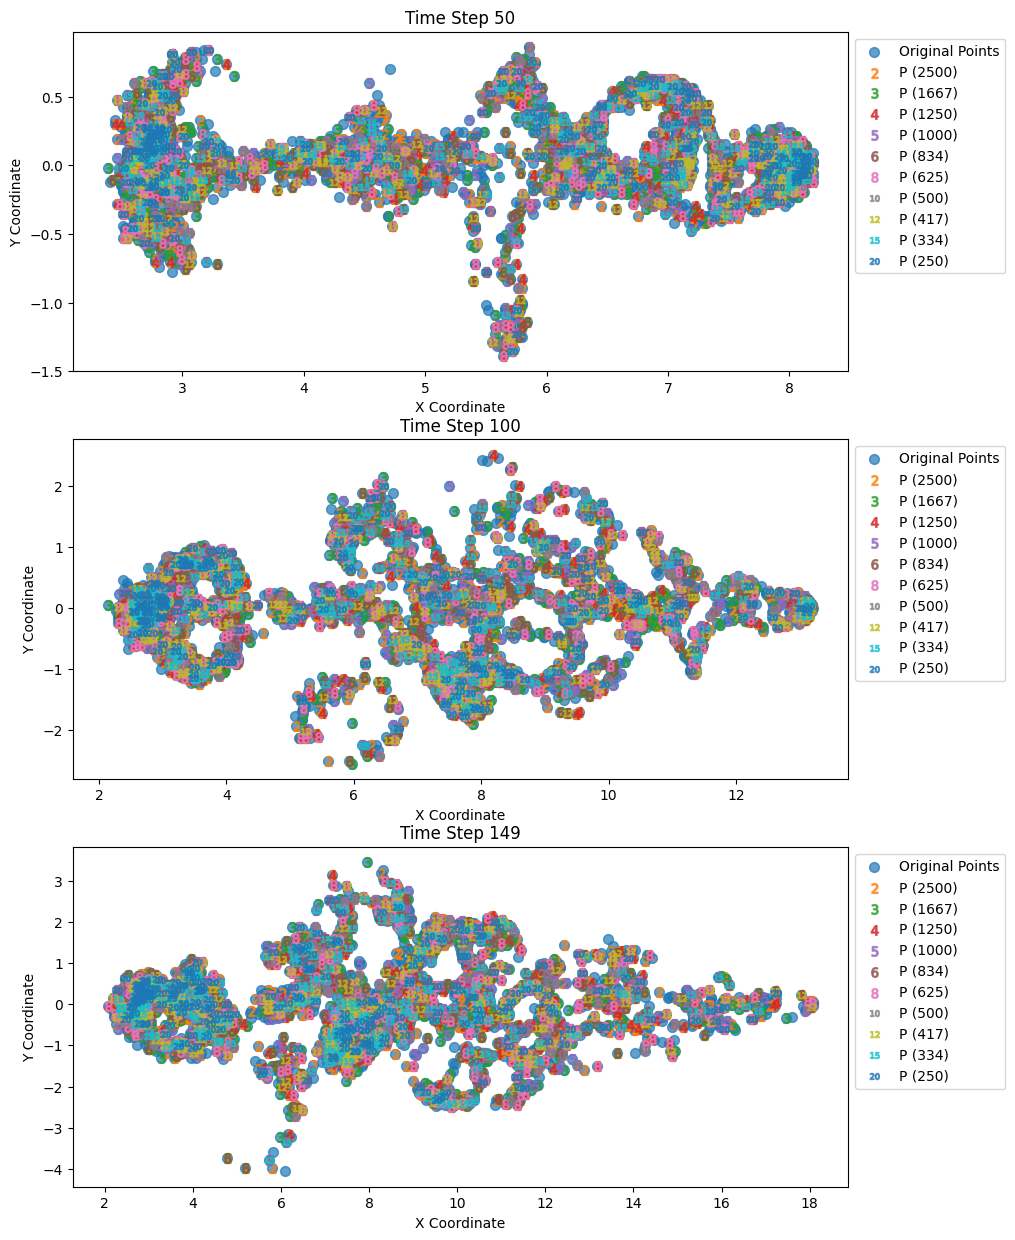

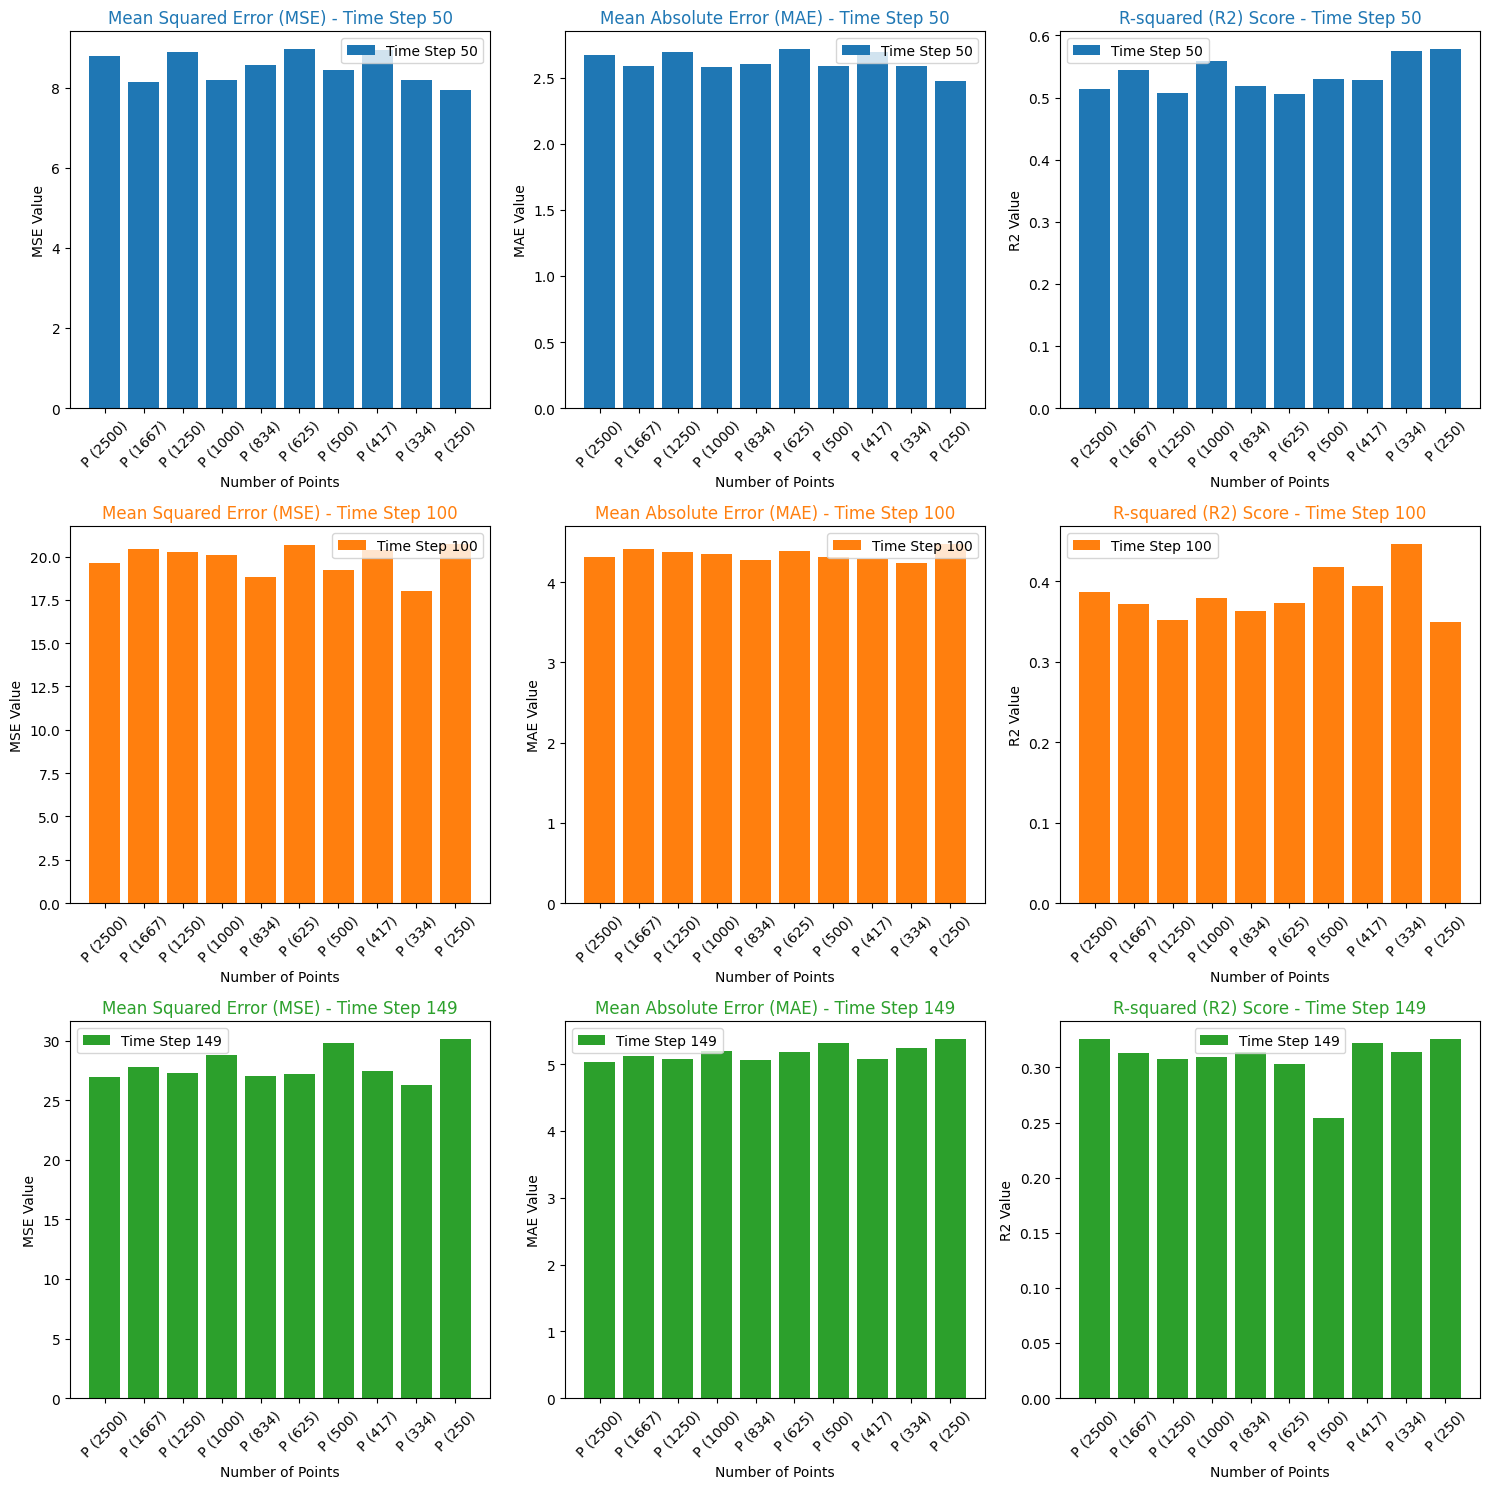

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]  # Updated patterns

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

# Add subplots for displaying MSE, MAE, and R2 values for each time step
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying MSE values
    axes_metrics[i, 0].bar(range(len(patterns)), mse_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mse_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 0].set_title(f'Mean Squared Error (MSE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 0].set_ylabel('MSE Value')  # Updated ylabel
    axes_metrics[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 0].legend()

    # Add a subplot for displaying MAE values
    axes_metrics[i, 1].bar(range(len(patterns)), mae_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mae_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 1].set_title(f'Mean Absolute Error (MAE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 1].set_ylabel('MAE Value')  # Updated ylabel
    axes_metrics[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 1].legend()

    # Add a subplot for displaying R2 values
    axes_metrics[i, 2].bar(range(len(patterns)), r2_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=r2_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 2].set_title(f'R-squared (R2) Score - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 2].set_ylabel('R2 Value')  # Updated ylabel
    axes_metrics[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [5000, 2500]

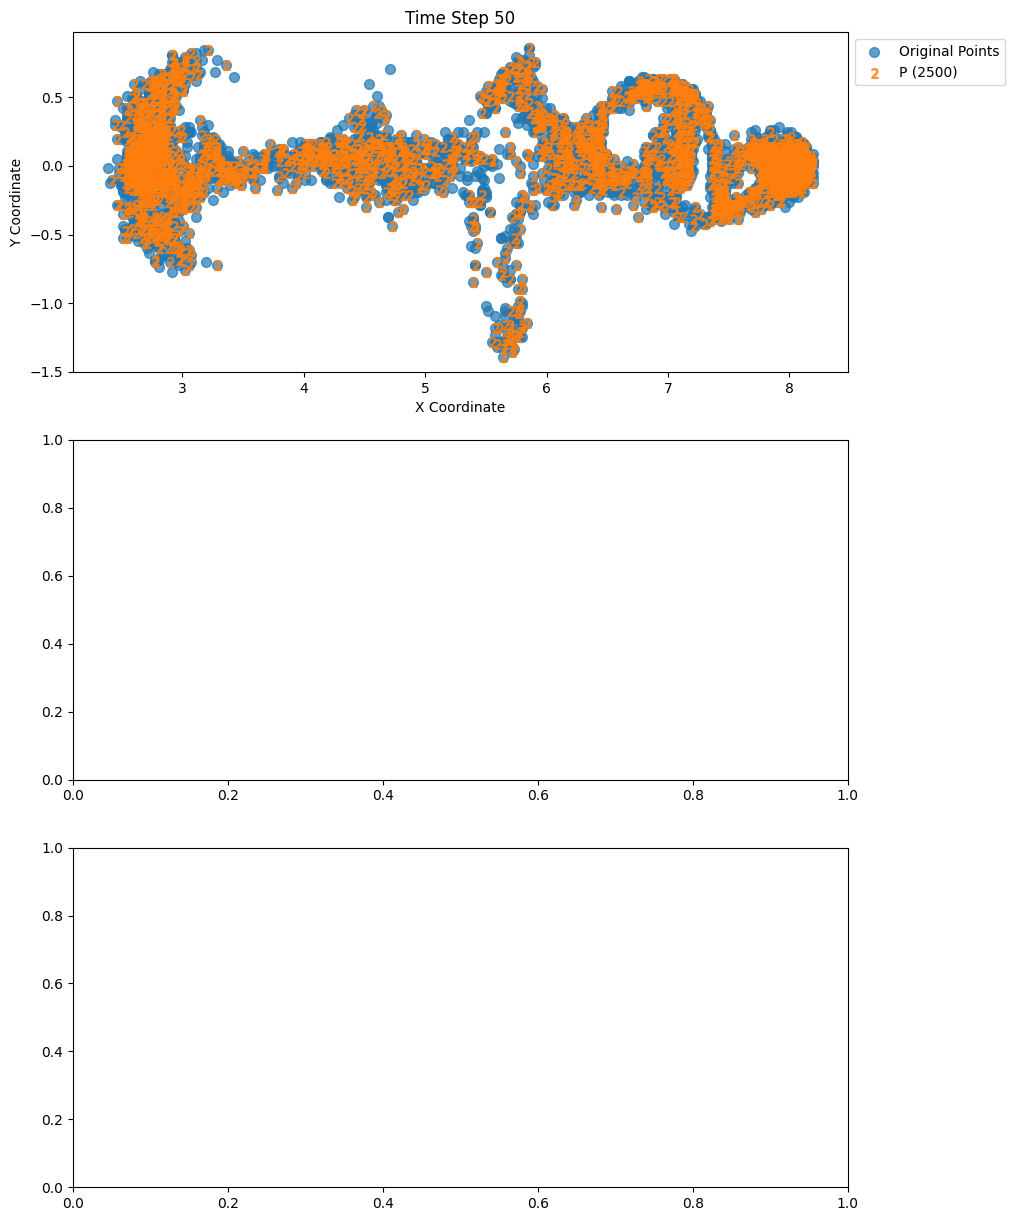

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store metrics values for each pattern and time step
metrics_values = {
    'mse': [],
    'mae': [],
    'r2': [],
    'distance_from_mean': [],
    'ks_statistic_x': [],
    'ks_p_value_x': [],
    'ks_statistic_y': [],
    'ks_p_value_y': []
}

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []
distance_from_mean_labels = []
ks_labels_x = []
ks_labels_y = []

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []
    distance_from_mean_labels_time_step = []
    ks_labels_x_time_step = []
    ks_labels_y_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            original_points['X'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            original_points['Y'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            original_points['X'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            original_points['Y'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([original_points['X'], original_points['Y']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        distance_from_mean = calculate_distance_from_mean(original_points, filtered_points[f'Pattern_{pattern}'])
        ks_statistic_x, ks_p_value_x = ks_2samp(original_points['X'], filtered_x_data[f'Column{time_step}'])
        ks_statistic_y, ks_p_value_y = ks_2samp(original_points['Y'], filtered_y_data[f'Column{time_step}'])

        # Append values to lists
        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        distance_from_mean_values.append(distance_from_mean)
        ks_statistic_x_values.append(ks_statistic_x)
        ks_p_value_x_values.append(ks_p_value_x)
        ks_statistic_y_values.append(ks_statistic_y)
        ks_p_value_y_values.append(ks_p_value_y)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')
        distance_from_mean_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_x_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_y_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)
    distance_from_mean_labels.append(distance_from_mean_labels_time_step)
    ks_labels_x.append(ks_labels_x_time_step)
    ks_labels_y.append(ks_labels_y_time_step)

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics_direct_comparison.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=8, ncols=1, figsize=(8, 30))

# Add a subplot for displaying MSE values
axes_metrics[0].bar(range(len(mse_values)), mse_values, tick_label=np.concatenate(mse_labels))
axes_metrics[0].set_title('Mean Squared Error (MSE) Comparison')
axes_metrics[0].set_ylabel('MSE Value')  # Updated ylabel
axes_metrics[0].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying MAE values
axes_metrics[1].bar(range(len(mae_values)), mae_values, tick_label=np.concatenate(mae_labels))
axes_metrics[1].set_title('Mean Absolute Error (MAE) Comparison')
axes_metrics[1].set_ylabel('MAE Value')  # Updated ylabel
axes_metrics[1].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying R2 values
axes_metrics[2].bar(range(len(r2_values)), r2_values, tick_label=np.concatenate(r2_labels))
axes_metrics[2].set_title('R-squared (R2) Score Comparison')
axes_metrics[2].set_ylabel('R2 Value')  # Updated ylabel
axes_metrics[2].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying Distance from Mean values
axes_metrics[3].bar(range(len(distance_from_mean_values)), distance_from_mean_values, tick_label=np.concatenate(distance_from_mean_labels))
axes_metrics[3].set_title('Distance from Mean Point Comparison')
axes_metrics[3].set_ylabel('Mean Distance')  # Updated ylabel
axes_metrics[3].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[3].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add subplots for KS Statistic and P-Value (X)
axes_metrics[4].bar(range(len(ks_statistic_x_values)), ks_statistic_x_values, tick_label=np.concatenate(ks_labels_x))
axes_metrics[4].set_title('KS Statistic (X) Comparison')
axes_metrics[4].set_ylabel('KS Statistic (X) Value')  # Updated ylabel
axes_metrics[4].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[4].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

axes_metrics[5].bar(range(len(ks_p_value_x_values)), ks_p_value_x_values, tick_label=np.concatenate(ks_labels_x))
axes_metrics[5].set_title('KS P-Value (X) Comparison')
axes_metrics[5].set_ylabel('KS P-Value (X) Value')  # Updated ylabel
axes_metrics[5].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[5].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add subplots for KS Statistic and P-Value (Y)
axes_metrics[6].bar(range(len(ks_statistic_y_values)), ks_statistic_y_values, tick_label=np.concatenate(ks_labels_y))
axes_metrics[6].set_title('KS Statistic (Y) Comparison')
axes_metrics[6].set_ylabel('KS Statistic (Y) Value')  # Updated ylabel
axes_metrics[6].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[6].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

axes_metrics[7].bar(range(len(ks_p_value_y_values)), ks_p_value_y_values, tick_label=np.concatenate(ks_labels_y))
axes_metrics[7].set_title('KS P-Value (Y) Comparison')
axes_metrics[7].set_ylabel('KS P-Value (Y) Value')  # Updated ylabel
axes_metrics[7].set_xlabel('Number of Points')  # Updated xlabel
axes_metrics[7].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()